## Assignment 2: Predicting how long will a user watch a stream?

VERY ROUGHT DRAFT OF WHAT OUR PROJECT IS AND WHAT WE ARE TRYING TO ACHIEVE

1. Identify the predictive task you will study

* dataset: Twitch interactions by Julian McAuley, twitch chat activity split by user, stream, stream nickname, and start/stop time in increments of 10 minutes.
* predict: how much time will a user stay on the stream 
* relevancy: by understading how much time a user will watch a stream, we might tailor the ads better))))
* evaluation: MSE?, R squared

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Data Proccessing, EDA, and Feature Engineering

A bit more about start and stop times and how data was collected, start time was the first time a user was seen inside a streams chat, data being collected every 10 minutes throughtout the whole website, end time is the last time a user was seen in the chat during a scan. We have translated considering scraping started at 12 am on the first of the month. 

##### FILE CAN BE DOWNLOADED AT THIS URL, IF YOU FOLLOW TO GDRIVE FOLDER: https://github.com/JRappaz/liverec?tab=readme-ov-file

I am thinking of not commiting the file here and just have a local copy on each one of ours laptops, easier to work with and doesnt require me uploading gupload module and setting up a url from gdive for a file

In [34]:
data = pd.read_csv('100k_a.csv')
data.head()

,user_id,stream_id,nickname,start,end
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594


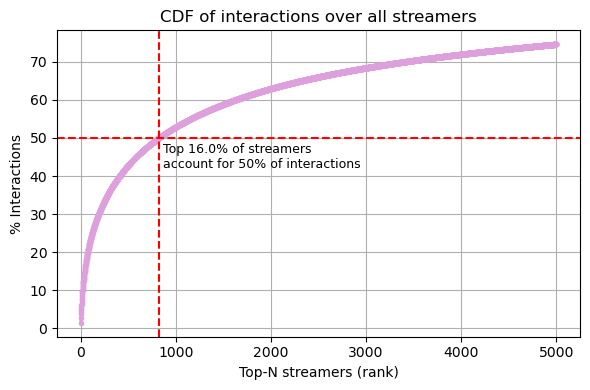

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

interaction_counts = data.groupby('nickname').size().sort_values(ascending=False)

total_interactions = interaction_counts.sum()
cum_pct = interaction_counts.head(5000).cumsum() / total_interactions * 100  # 0–100%

x = np.arange(1, len(cum_pct) + 1)

k_50 = np.argmax(cum_pct.values >= 50) + 1
y_50 = cum_pct.iloc[k_50 - 1]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(x, cum_pct.values, marker='.', linewidth=2, color = 'plum')

ax.axhline(50, linestyle='--', color = 'red')

ax.axvline(k_50, linestyle='--', color = 'red')

ax.text(
    k_50 * 1.05, 42,
    f"Top {np.round((k_50 / len(cum_pct) * 100), 0)}% of streamers\naccount for 50% of interactions",
    fontsize=9
)

ax.set_xlabel("Top-N streamers (rank)")
ax.set_ylabel("% Interactions")
ax.set_title("CDF of interactions over all streamers")
ax.grid(True)

plt.tight_layout()
plt.show()


#### Note to self, maybe this could be an idea for a baseline since most interactions and assuming time spent are on big players that mignt be the baseline

In [38]:
data['duration'] = (data['end'] - data['start']) * 10

data['starting_time'] = data['start'].apply(lambda x: datetime(2025, 1, 1) + timedelta(minutes=x * 10))
data['day_of_week'] = data['starting_time'].dt.day_name()

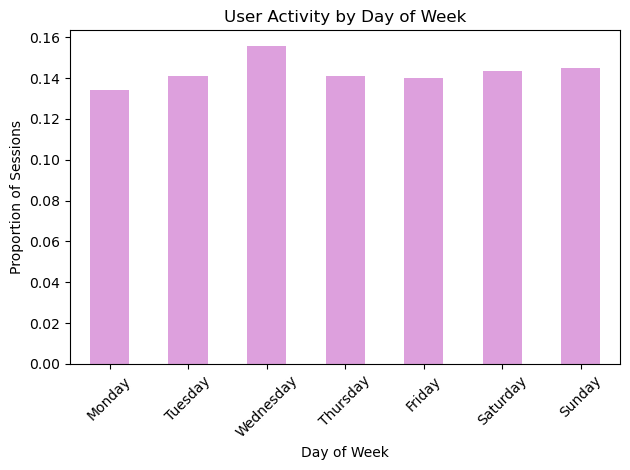

In [ ]:
import matplotlib.pyplot as plt

day_counts = data['day_of_week'].value_counts(normalize=True)
calendar_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_counts = day_counts.reindex(calendar_order)
day_counts.plot(kind='bar', color = 'plum')
plt.title("User Activity by Day of Week")
plt.ylabel("Proportion of Sessions")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Note to self: Day of the week might not be a great feature, not a lot of variety

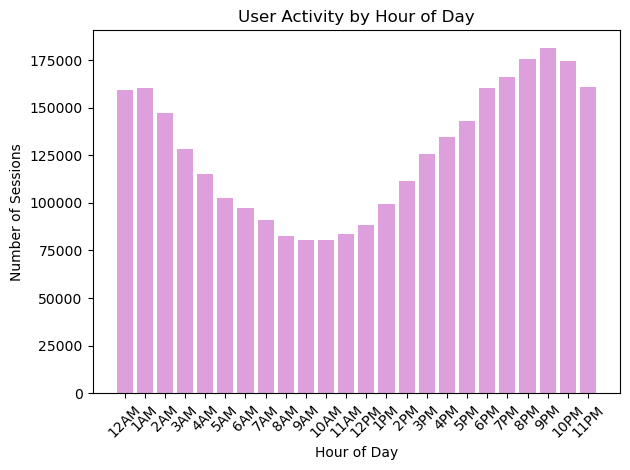

In [53]:
data['hour_of_day'] = data['starting_time'].dt.hour
hour_counts = data['hour_of_day'].value_counts().sort_index()
ampm_labels = [f"{(h % 12 or 12)}{'AM' if h < 12 else 'PM'}" for h in hour_counts.index]

plt.bar(ampm_labels, hour_counts, color='plum')

plt.title("User Activity by Hour of Day")
plt.ylabel("Number of Sessions")
plt.xlabel("Hour of Day")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Note to self: a lot of variety can be a good predictor

### How can baselines look like?

These should be based off lecture material or hw/assignments (assuming these are the rules)